chebyshev.ipynb was getting too big, so we're starting a new one

In [1]:
from sympy import init_session
init_session()
from mpmath import mpf
%matplotlib inline

IPython console for SymPy 1.0.1.dev (Python 3.5.2-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/dev



Now we try to mechanise the CRAM process

In [55]:
def bisect_roots(expr, bounds, eps=1e-7, division_cutoff=30, solver='bisect', **kwargs):
    """
    Numerically find all the roots of expr in bounds via bisection
    
    division_cutoff is the fraction of bounds to check for roots. 
    One should expect the roots to be no more than |bounds|/division_cutoff apart.
    """
    roots = []
    intervals = [bounds]
    var = expr.free_symbols.pop()
    N = 0
    while intervals:
        N += 1
        #print(intervals)
        b = intervals.pop()
        try:
            root = nsolve(expr, b, solver=solver, **kwargs)
        except ValueError:
            # No root found
            if (b[1] - b[0]) > (bounds[1] - bounds[0])/division_cutoff and sign(expr.evalf(subs={var: b[0]})) == sign(expr.evalf(subs={var: b[1]})):
                # The bisect method will only work if the interval has alternate signs.
                # If not, it will miss 2 roots, so try again with split intervals.
                intervals.append([b[0], (b[0] + b[1])/2])
                intervals.append([(b[0] + b[1])/2, b[1]])
                continue
        else:
            if root not in roots:
                roots.append(root)
                intervals.append([b[0], root - eps])
                intervals.append([root + eps, b[1]])
    
    print(N)
    return sorted(roots)

bisect_roots(sin(x), [-10, 13])

115


[mpf('-9.4247779607693797'),
 mpf('-6.2831853071795865'),
 mpf('-3.1415926535897932'),
 mpf('0.0'),
 mpf('3.1415926535897932'),
 mpf('6.2831853071795865'),
 mpf('9.4247779607693797'),
 mpf('12.566370614359173')]

In [74]:
def nsolve_intervals(expr, bounds, division=30):
    """
    Divide bounds into division intervals and nsolve in each one
    """
    roots = []
    L = bounds[1] - bounds[0]
    for i in range(division):
        interval = [bounds[0] + i*L/division, bounds[0] + (i + 1)*L/division]
        try:
            root = nsolve(expr, interval, solver='bisect')
        except ValueError:
            continue
        else:
            roots.append(root)
            
    return roots
        
nsolve_intervals(D, [-1, 0.99])

[mpf('-0.39506511254484362'),
 mpf('0.20691058995491739'),
 mpf('0.65489012733235114'),
 mpf('0.89772666518036314')]

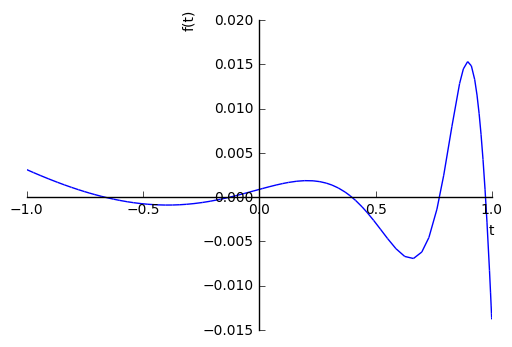

In [76]:
def CRAM_exp2():
    epsilon = symbols("epsilon")
    p0, p1, p2, q1, q2 = symbols("p0, p1, p2, q1, q2")
    i = symbols("i")
    
    E = exp(-(-t - 1)/(2*t - 2)) - (p0 + p1*t + p2*t**2)/(1 + q1*t + q2*t**2)
    expr = E + (-1)**i*epsilon
    expr = expr*(1 + q1*t + q2*t**2)
    expr = simplify(expr)

    system = Tuple(*[expr.subs({i: j, t: chebyshevt_root(7, 6-j)}) for j in range(1,7)])
    sols = [dict(zip([p0, p1, p2, q1, q2, epsilon], nsolve(system, [p0, p1, p2, q1, q2, epsilon], [1, 1, 1, 1, 1, 0])))]
    plot(E.subs(sols[0]), (t, -1, 1))
    D = diff(E.subs(sols[0]), t)
    extreme_x2 = [-1, *nsolve_intervals(D, [-1, 0.99]), 1]
    return D

D = CRAM_exp2()

In [9]:
nsolve(D, (-1, -0.39506511254484362 - 1e-20), solver='bisect', tol=1e-20)

mpf('-0.39506511254484362')

In [10]:
#import mpmath
#mpmath.findroot?

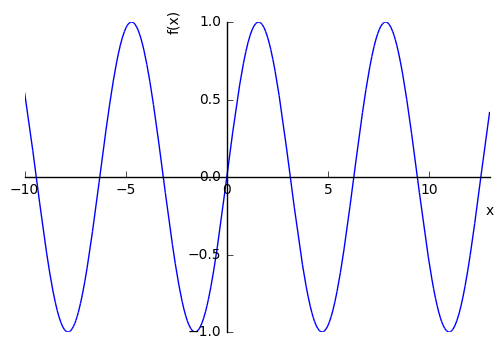

In [51]:
plot(sin(x), (x, -10, 13))

In [12]:
nsolve(sin(x), [-10, -0.1], solver='bisect')

mpf('-3.1415926535897932')

In [56]:
bisect_roots(D, [-1, 0.9], solver='bisect')

93


[mpf('-0.39506511254484362'),
 mpf('0.20691058995491739'),
 mpf('0.65489012733235114'),
 mpf('0.89772666518036314')]

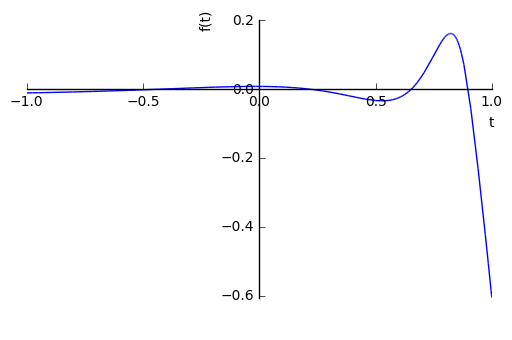

In [14]:
plot(D, (t, -1, 1))

In [15]:
nsolve(D, [mpf('0.2069106899549174') + 1e-4, 0.999], solver='ridder')

mpf('0.20691058995491739')

In [58]:
intervals = [[i/30, (i+1)/30] for i in range(-30, 29)]

In [68]:
def catch_ValueError(f):
    try:
        return f()
    except ValueError:
        pass

In [69]:
[catch_ValueError(lambda: nsolve(D, b, solver='bisect')) for b in intervals]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 mpf('-0.39506511254484362'),
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 mpf('0.20691058995491739'),
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 mpf('0.65489012733235114'),
 None,
 None,
 None,
 None,
 None,
 None,
 mpf('0.89772666518036314'),
 None,
 None]

In [42]:
sin(x).evalf(subs={x: mpf('9.9999999999999995e-8')})